In [3]:

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics


## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

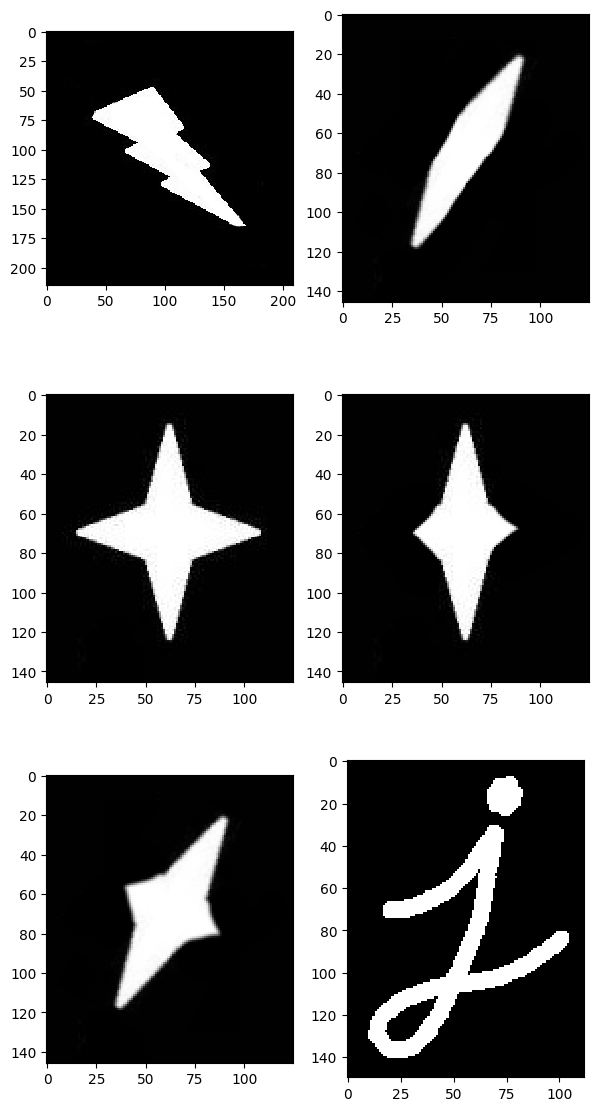

In [4]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [ ]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))


2


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [ ]:
# TODO
# Your Answer
# one pixel line of black and white. flatten makes it a 1D array.

one pixel line of black and white. flatten makes it a 1D array.


## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


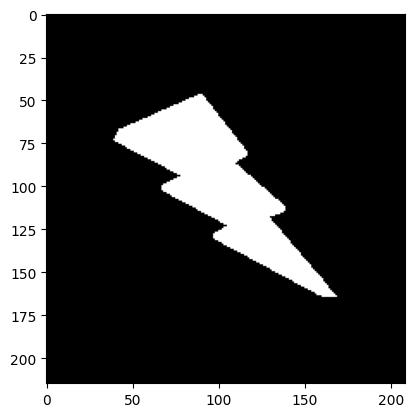

In [16]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [ ]:
## TODO
## Your answer
''' when the above values are used for thresholding there will be mostly black pixels.
This is because the range is too small and the pixels that are between 0 and 200 will be set to 0, the rest will be set to 255.
A 'good' value would be 127-255 because it will reflect the actual colors of the image better.
'''

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

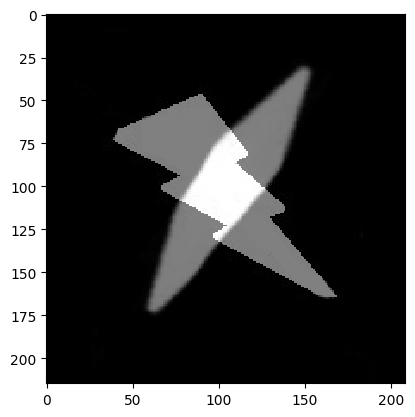

In [27]:
# 1. Blend
# TODO

blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
blend = cv2.addWeighted(lightningbolt, 0.5, blob_resized, 0.5, 0)

plt.imshow(blend, cmap='gray', interpolation='none')
plt.show()


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

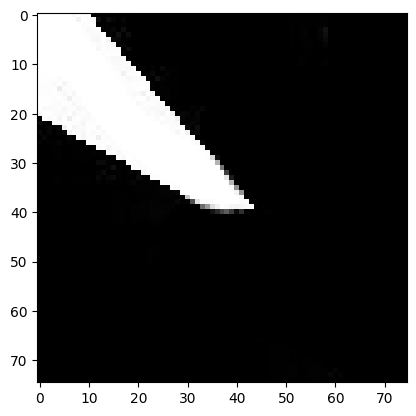

In [30]:
# 2. ROI
# TODO
roi = lightningbolt[125:200, 125:200]
plt.imshow(roi, cmap='gray', interpolation='none')
plt.show()


## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

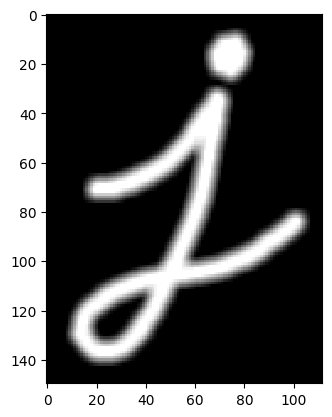

In [38]:
# 3. 
# TODO

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(letterj,-1,kernel)
plt.imshow(dst, cmap='gray', interpolation='none')
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

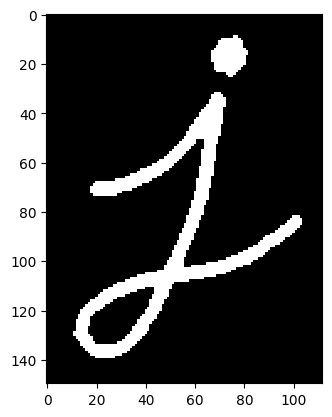

In [43]:
# 4
# TODO

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray', interpolation='none')
plt.show()

## 5. Perform erosion on j with a 5x5 kernel

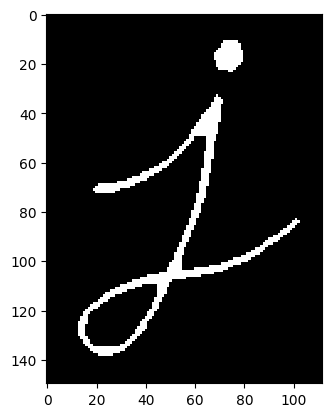

In [44]:
# 5
# TODO

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray', interpolation='none')
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



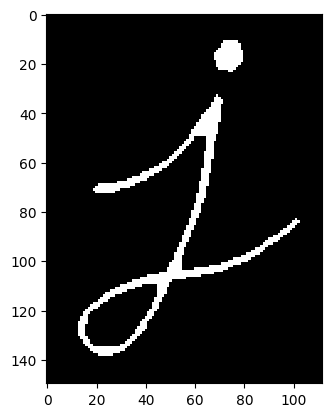

In [47]:
# 6
# TODO

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosion, cmap='gray', interpolation='none')
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

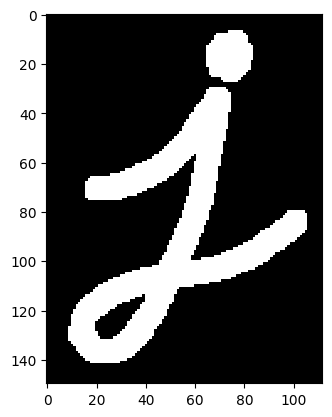

In [49]:
# 7
# TODO
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray', interpolation='none')
plt.show()


## 8. Perform dilation on j with a 5x5 kernel

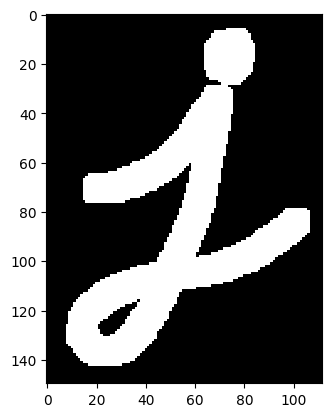

In [50]:
# 8
# TODO
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray', interpolation='none')
plt.show()


## 9. What is the effect of kernel size on morphology operations?

In [51]:
# 9
# TODO
'''The larger the kernel, the more the image will be affected. 
This is because there is a lower chance that the kernal will be all one color or another the larger the kernel.
Thus, for erosion, more of the foreground will be removed.
For dilation, more of the background will be removed.'''

'The larger the kernel, the more the image will be affected. \nThis is because there is a lower chance that the kernal will be all one color or another the larger the kernel.\nThus, for erosion, more of the foreground will be removed.\nFor dilation, more of the background will be removed.'

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [54]:
# 10
# TODO
'''The difference between the two is that repeated iterations with a smaller kernel will have a more gradual effect on the image.
This can make the image more smooth.
While for one iteration with a larger kernel, the image will be changed in one go, making it more sharp.'''

'The difference between the two is that repeated iterations with a smaller kernel will have a more gradual effect on the image.\nThis can make the image more smooth.\nWhile for one iteration with a larger kernel, the image will be changed in one go, making it more sharp.'

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

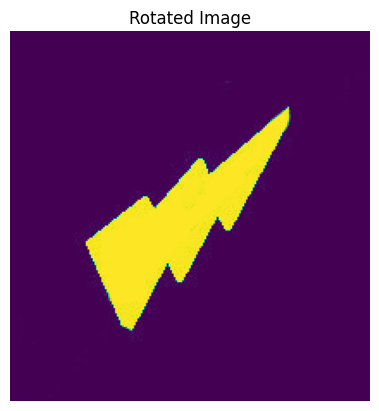

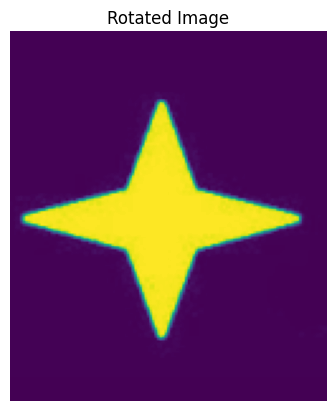

In [53]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()
rows, cols = star.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

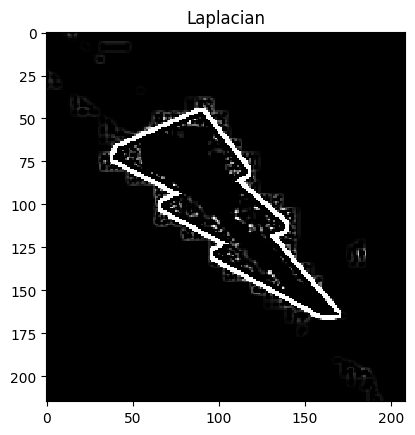

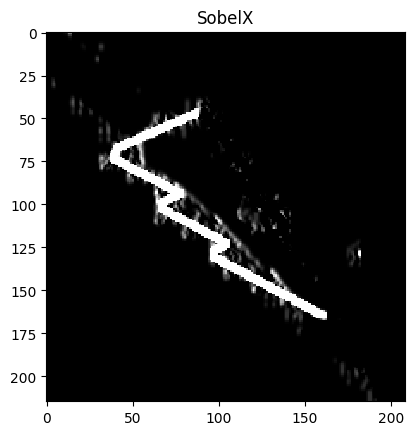

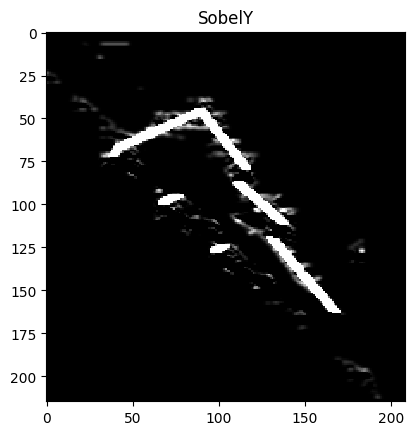

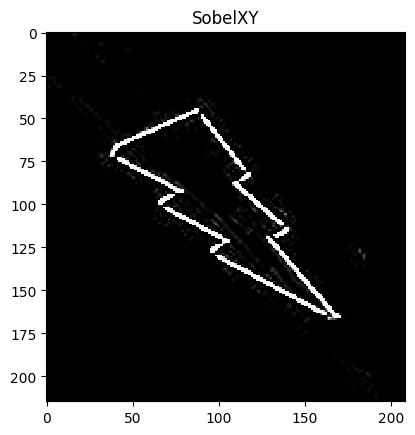

In [8]:
laplacian = cv2.Laplacian(lightningbolt,cv2.CV_8U,ksize=5)
plt.imshow(laplacian, cmap='gray', interpolation='none')
plt.title('Laplacian')
plt.show()

sobelx =  cv2.Sobel(lightningbolt,cv2.CV_8U,1,0,ksize=5)
plt.imshow(sobelx, cmap='gray', interpolation='none')
plt.title('SobelX')
plt.show()

sobely =  cv2.Sobel(lightningbolt,cv2.CV_8U,0,1,ksize=5)
plt.imshow(sobely, cmap='gray', interpolation='none')
plt.title('SobelY')
plt.show()

sobelxy =  cv2.Sobel(lightningbolt,cv2.CV_8U,1,1,ksize=5)
plt.imshow(sobelxy, cmap='gray', interpolation='none')
plt.title('SobelXY')
plt.show()





## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 